In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt

(trainInput, trainOutput), (testInput, testOutput) = fashion_mnist.load_data()

#resacaling pixel data from 0~255 to 0.0~1.0
trainInput = trainInput / 255.0 
testInput = testInput / 255.0

className = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',	'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(close=None, block=None)>

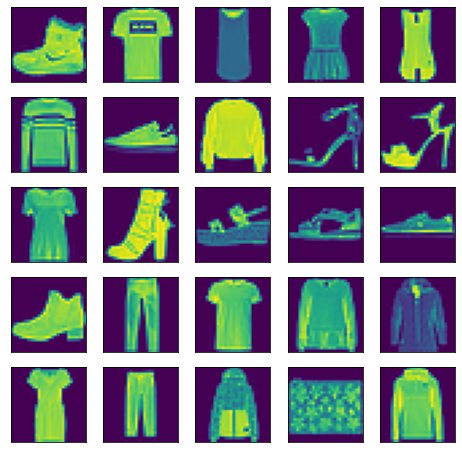

In [2]:
#figsize inits graph size to 15x15 inchs(fuck americans)
plt.figure(figsize=(8,8))
#going to output 25 img
for i in range(25):
    plt.subplot(5,5, i+1) #i+1th position in 5x5 grid
    #set current modifying locations 
    plt.xticks([])
    plt.yticks([])
    
    plt.grid(False)
    plt.imshow(trainInput[i])
    plt.xlabel(className[trainOutput[i]], color='w')
plt.show


In [3]:
model = tf.keras.Sequential([
    #mnist data is 2D 28x28, turns it into 1D 784(28x28) 
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    #10 classes
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [4]:
model.fit(trainInput, trainOutput, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4963 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3728 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3114 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2936 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2468 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [5]:
# verbose 0=none 1=animatedPrograssBar 2=n/total
testLoss, testAcc = model.evaluate(testInput, testOutput, verbose=1)
print('TestAcc = ', testAcc)

313/313 [==============================] - 0s 977us/step - loss: 0.3208 - accuracy: 0.8865
TestAcc =  0.8865000009536743


In [6]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probabilityModel.predict(testInput)



313/313 [==============================] - 0s 852us/step
